# **Plots notebook**

This notebook plots together the results obtained from the advection equation solver by reading them from specially created files.

In [134]:
import numpy as np
import matplotlib.pyplot as plt
import os

# **Plots parameters**

Be sure the results have been previously saved.

Adjust the parameters below at your will.

In [135]:
#               0            1
methods = ["UPWIND-FC", "UPWIND-NFC"]

# Whether to save the plots or not
save = False

# Size of the figures
figsize = (10, 8)

# dpi of the figures
dpi = 500

# Plotting functions

In [136]:
# Support variables
#
#-----------------------------------------
# Map the methods with indexes
methods_indexes = dict(zip(methods, range(len(methods))))

# Limits for the zoom plots
axins_xlim = [(7.8, 8.4), (7, 7.5)]
axins_ylim = [(0, 7.5), (0, 6.2)]

A function that plots together the results for a given scheme in a readable way.

In [137]:
# Use the mothods in the array methods at the beginning of the notebook
# Careful, uses global variables
def plot_method_if_merged(method, figsize=(6.4, 4.8), dpi=100, save=False):
    # Get the desired files (based on how file names are written)
    # Be sure 'method' coincides with the method directory
    data_folder_path = os.path.join(method, "data")
    images_folder_path = os.path.join(method, "images")
    file_paths = [os.path.join(data_folder_path, file_name) for file_name in os.listdir(data_folder_path)
                  if file_name.split('_')[0].lower() == 'if']
    
    # Load the desired files
    data = [np.load(file_path) for file_path in file_paths]
    
    # Extract relevant informations and define linestyles
    nx = []

    for i in range(len(data)):
        # Based on how 'par_label' is written
        nx.append(int(str(data[i]['par_label']).split('$')[2]))

    # Plot and format data
    fig, ax = plt.subplots(figsize=figsize, dpi=dpi)

    ax.set_title("Initial and Final conditions")
    ax.set_xlabel(r"$x$")
    ax.set_ylabel(r"$u$")

    # Get colors for the final conditions
    colors = plt.colormaps.get_cmap('jet')(np.linspace(0, 1, len(data)))

    # Initial data (equal for every set of data, plot just once)
    ax.plot(data[0]['x_grid'], data[0]['u_i'], ls='-', label="Initial", zorder=len(data)+1)

    # Make a zoom plot
    axins = ax.inset_axes([0.075, 0.4, 0.3, 0.55],
                          xlim=axins_xlim[methods_indexes[method]], ylim=axins_ylim[methods_indexes[method]],
                          yticklabels=[])
    ax.indicate_inset_zoom(axins, edgecolor='black')
    
    # Final data
    for i in range(len(data)):
        label = str(data[i]['par_label'])
        ax.plot(data[i]['x_grid'], data[i]['u_f'], ls='--', label=label,
                c=colors[i], zorder=i)
        axins.plot(data[i]['x_grid'], data[i]['u_f'], ls='--', c=colors[i]) # Zoom plot

    ax.legend()

    if save:
        img_name = '_'.join(["IF", method])
        plt.savefig(os.path.join(images_folder_path, img_name), dpi=dpi)

    plt.show()

    return data

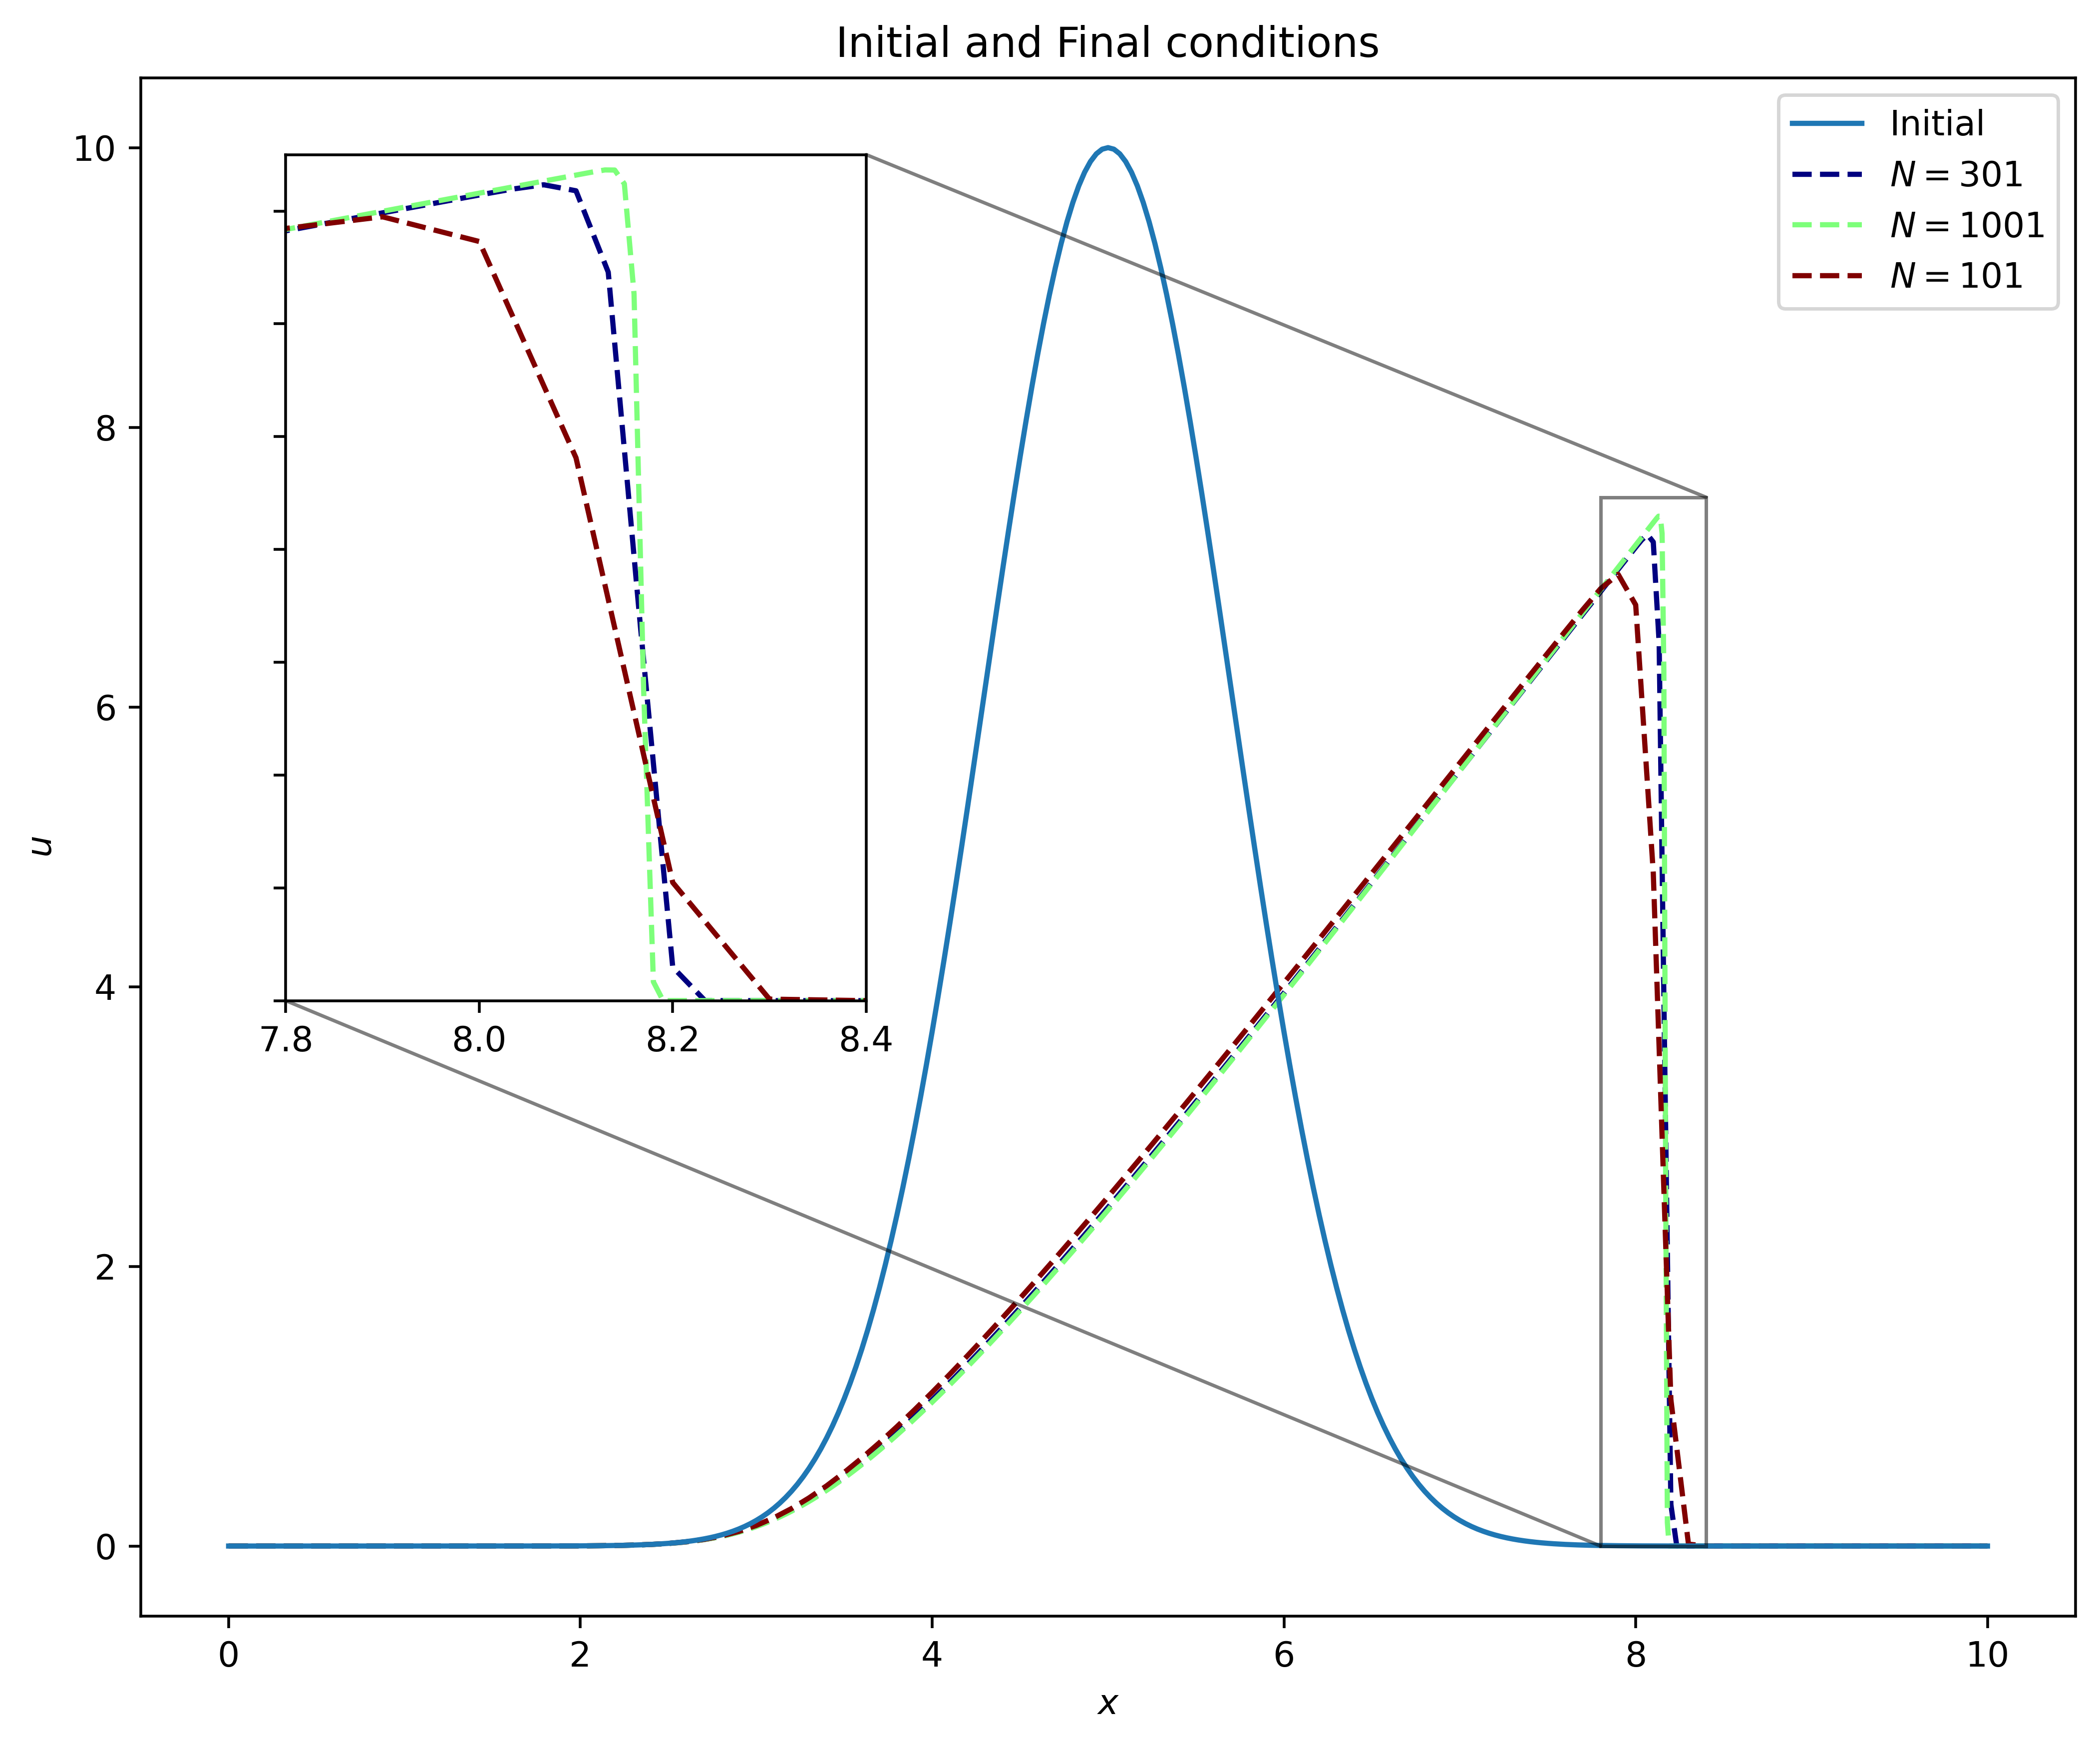

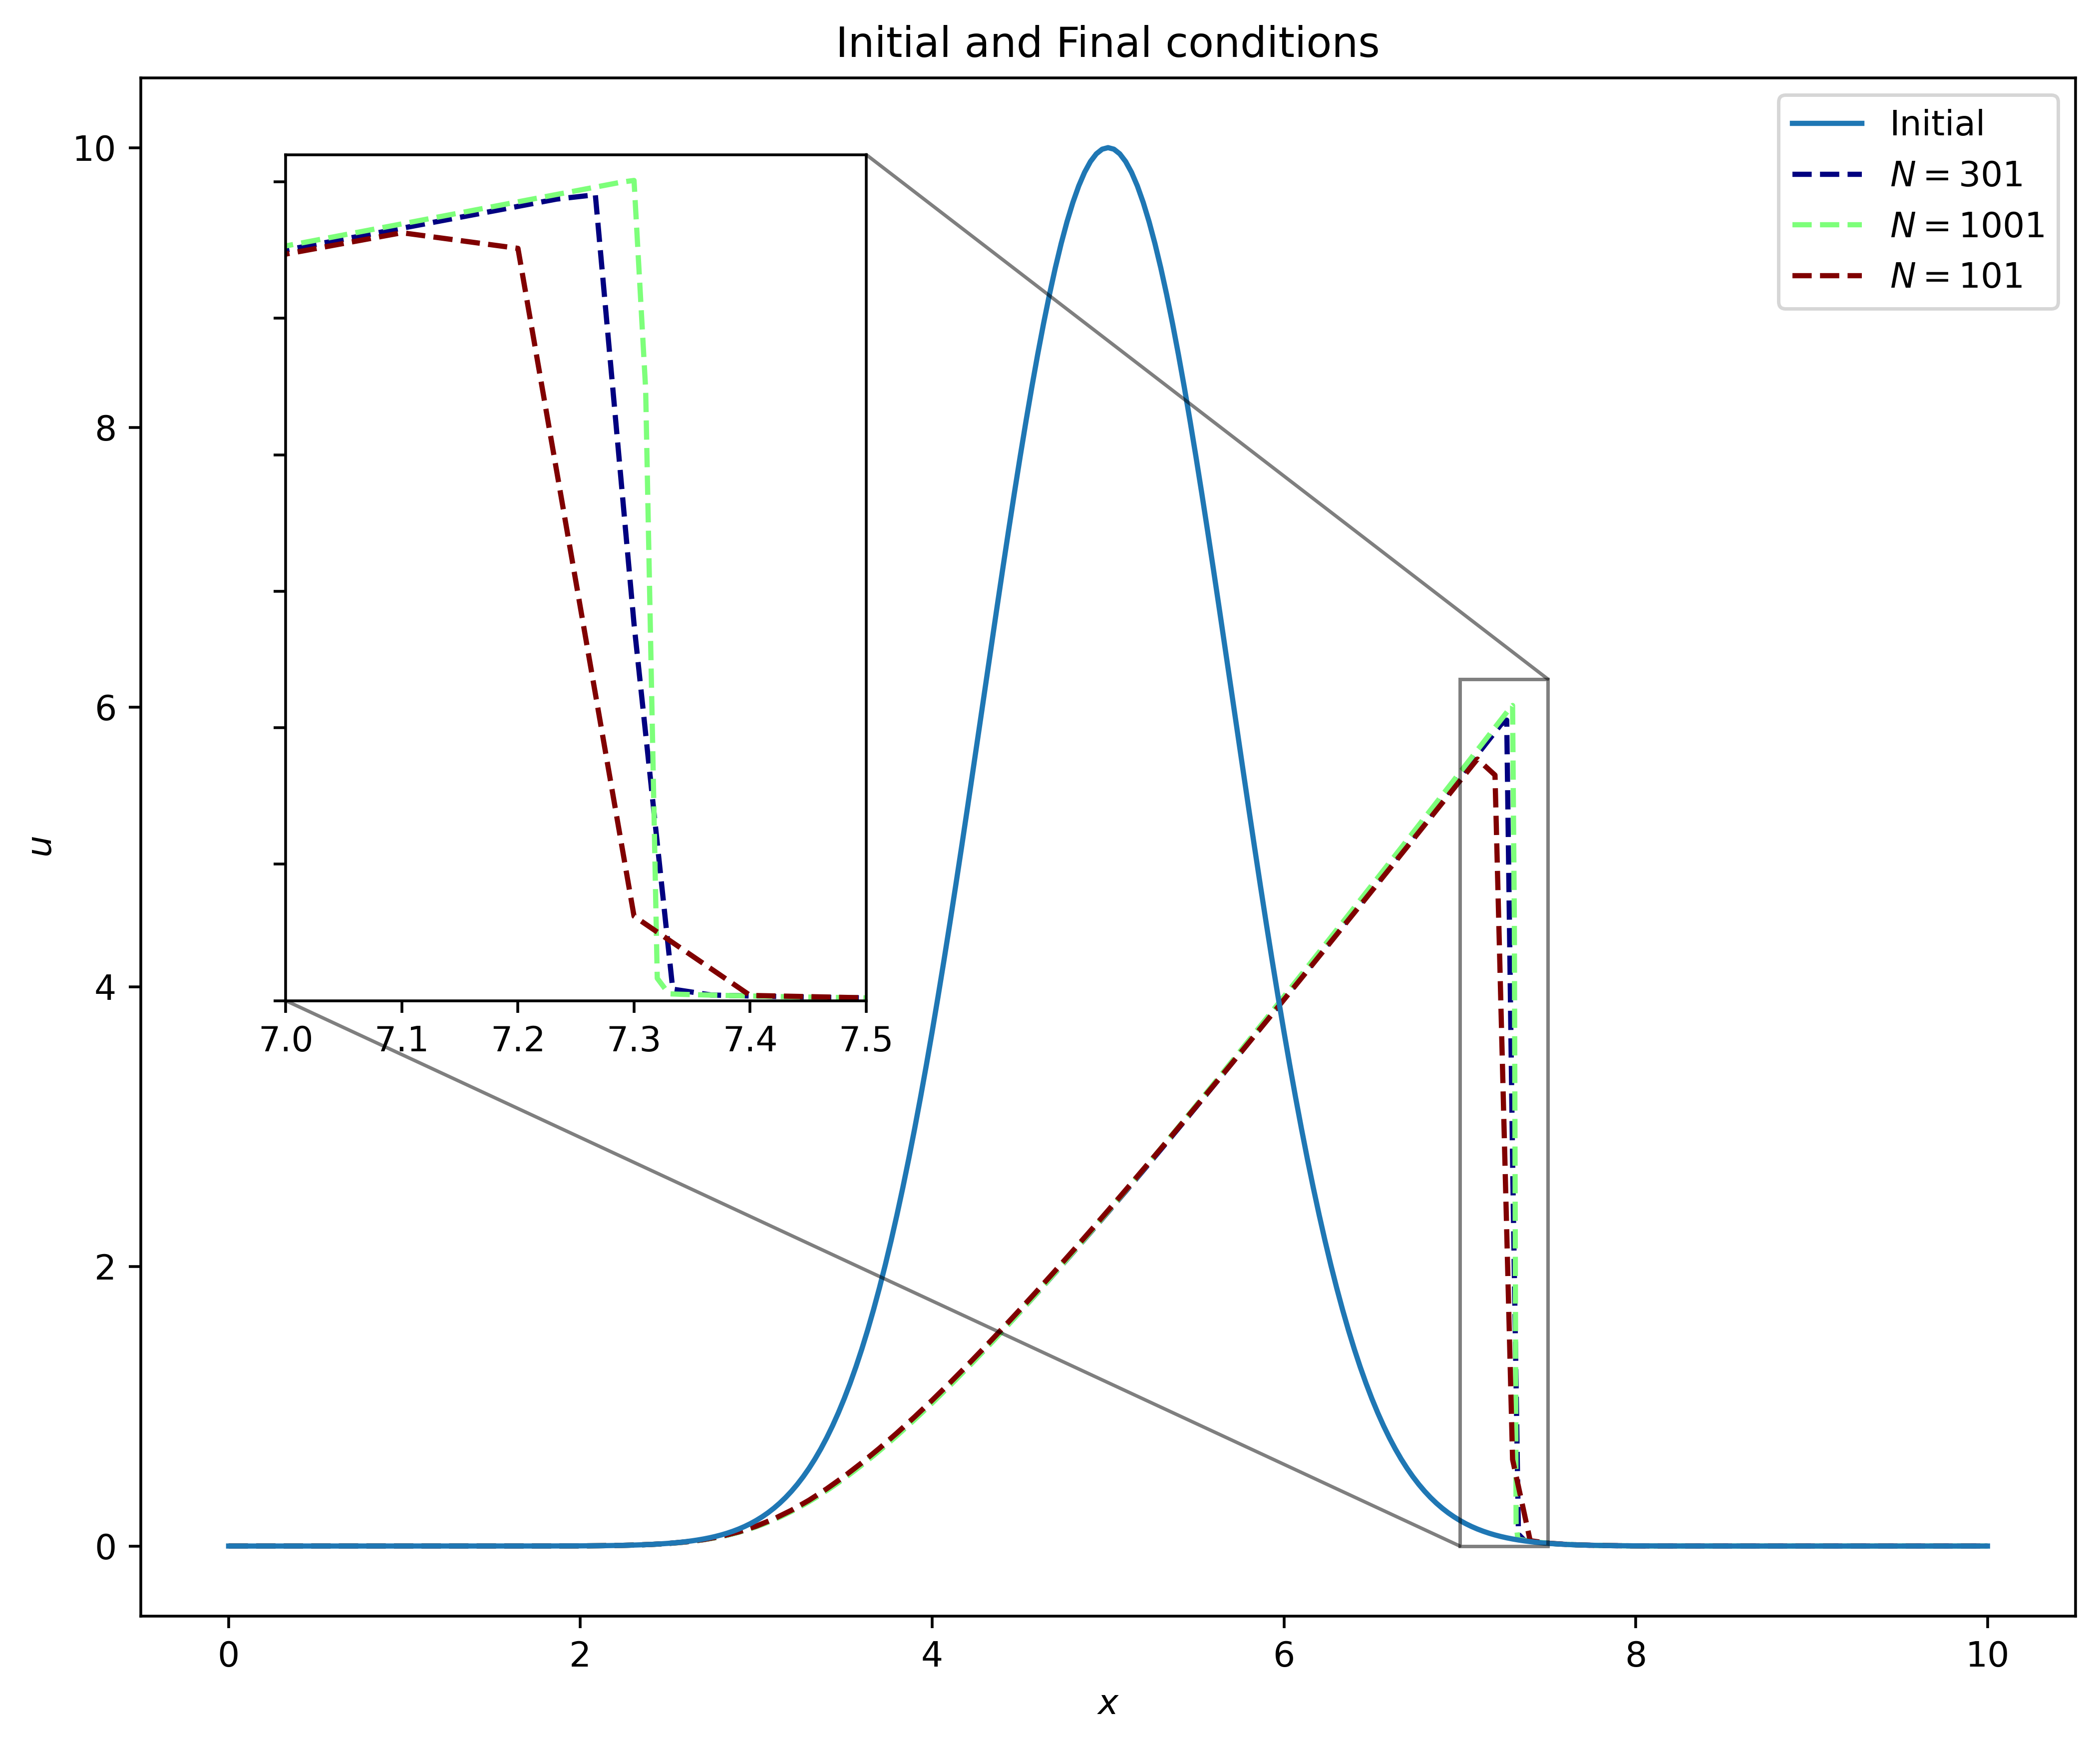

In [138]:
for method in methods:
    plot_method_if_merged(method, figsize=figsize, dpi=dpi, save=save)

Plot together the results from the 2 schemes, focusing on the differences between the two.

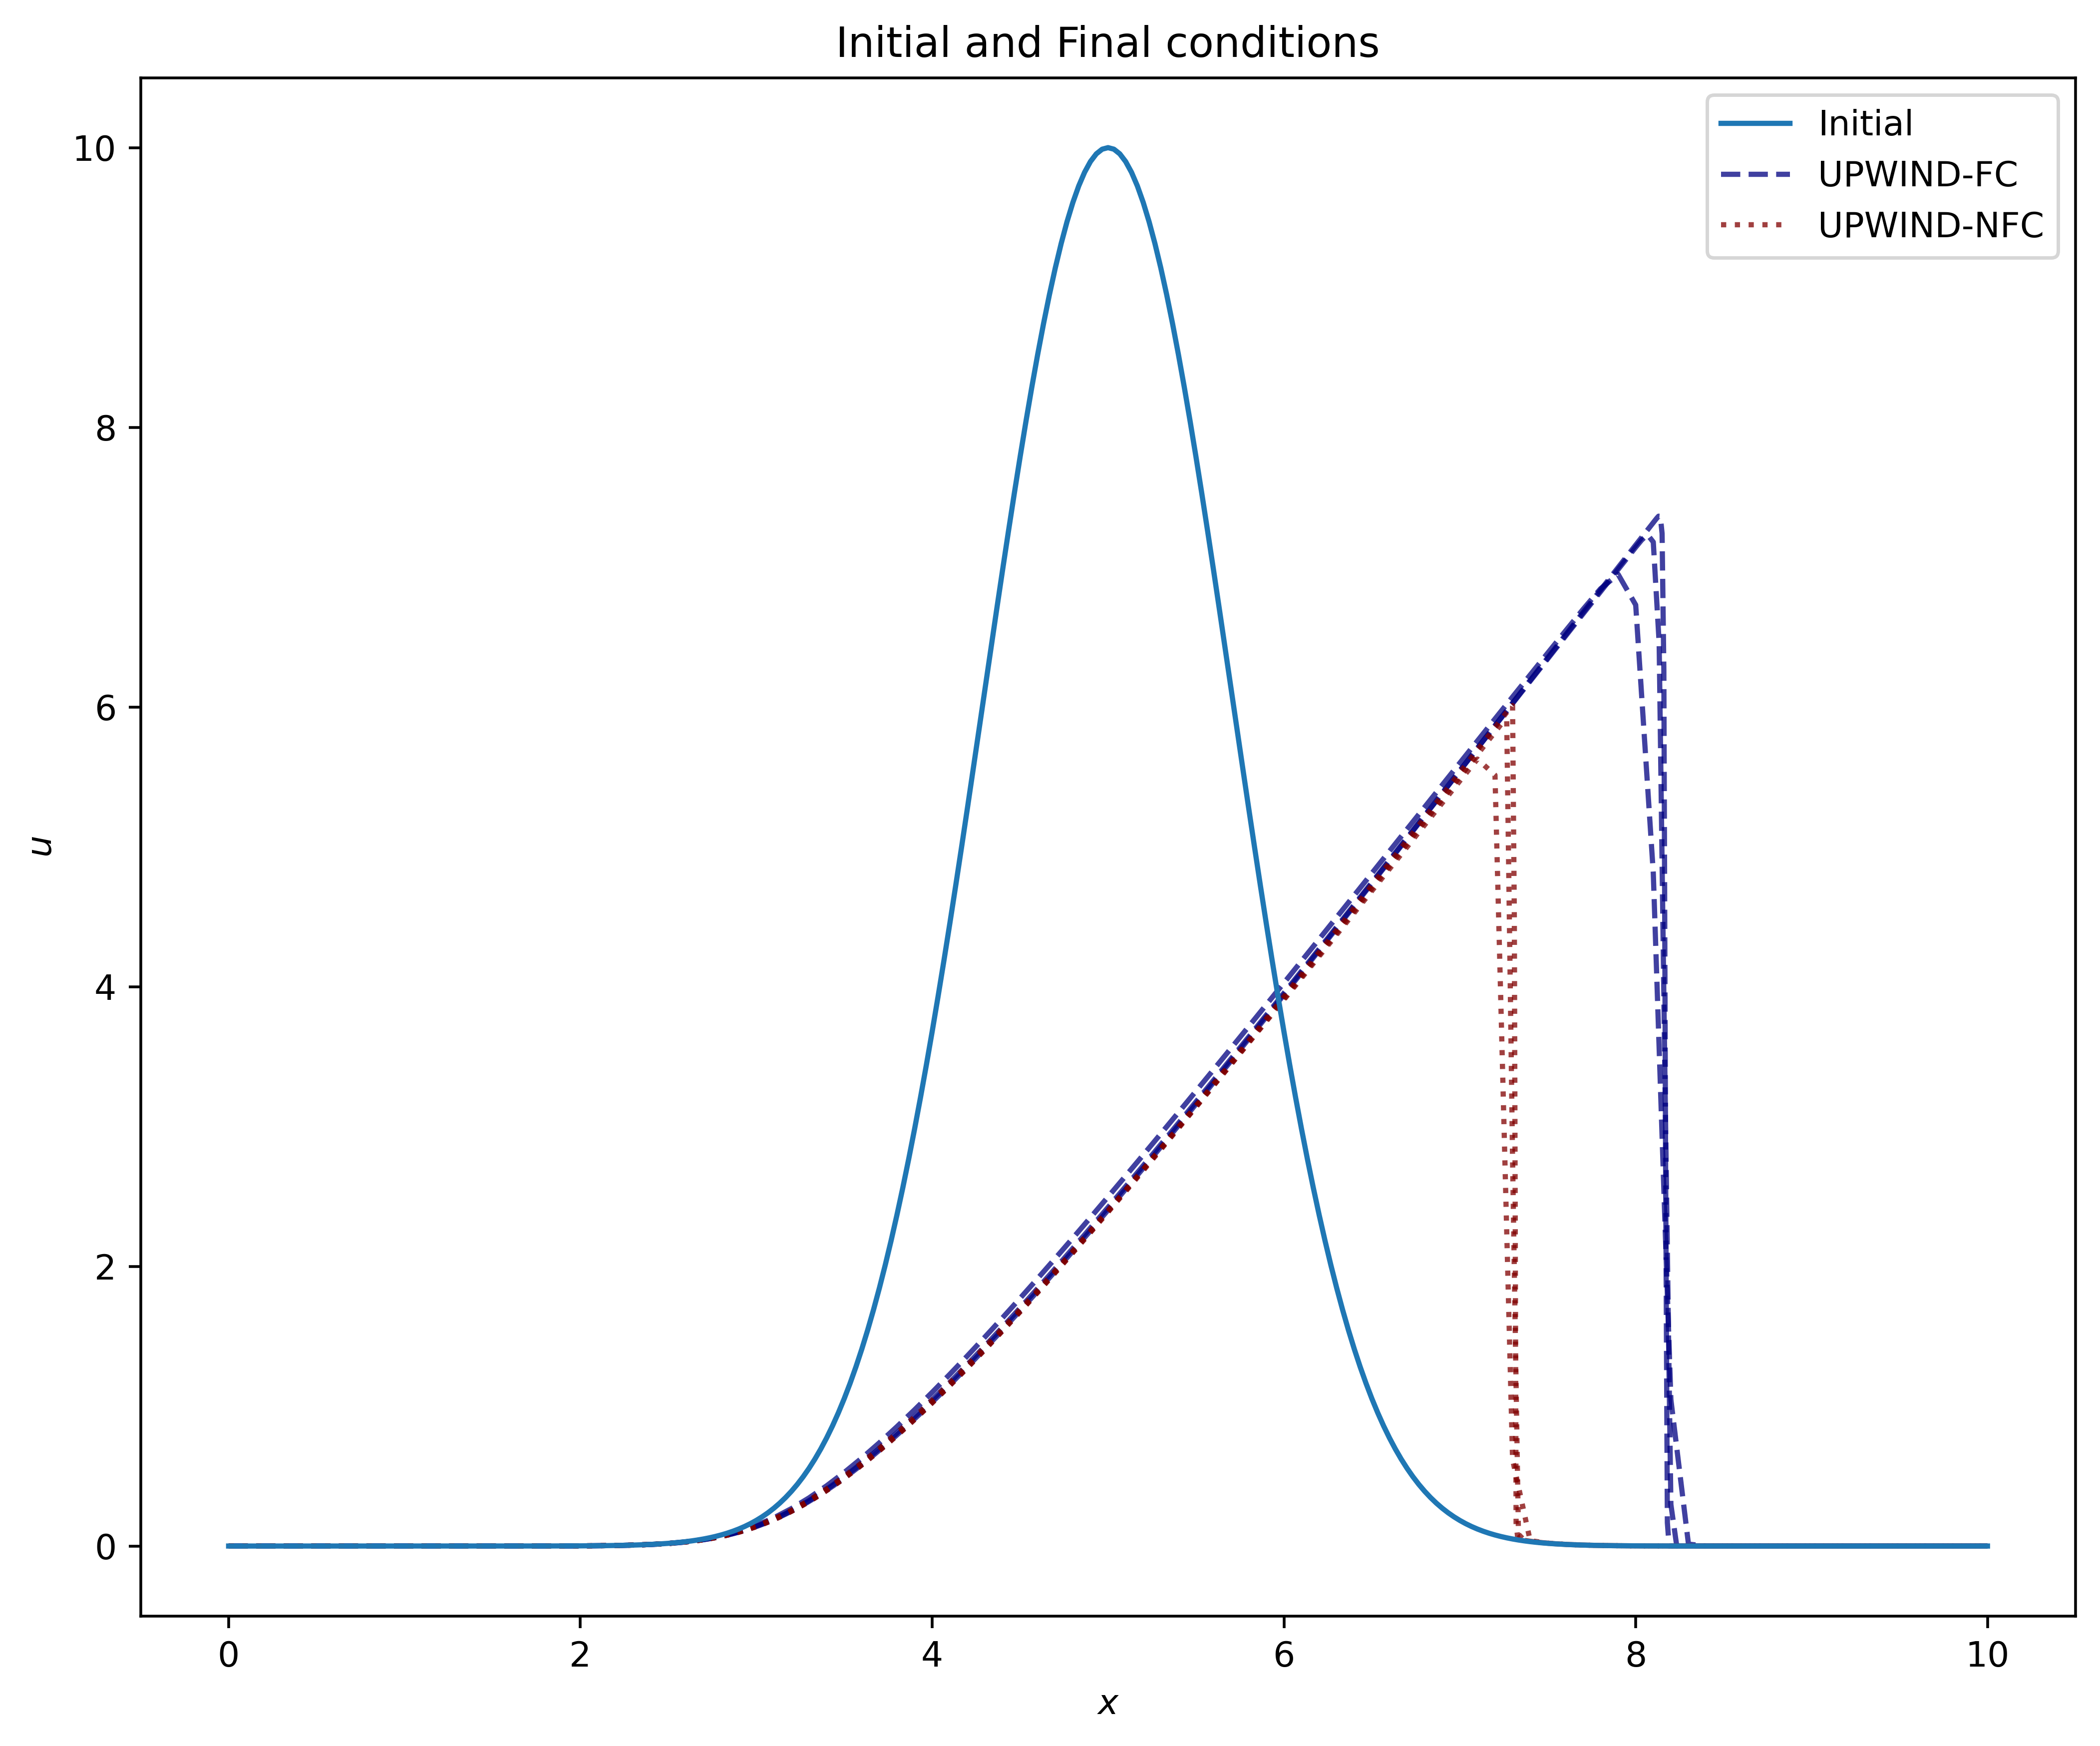

In [139]:
fig, ax = plt.subplots(figsize=figsize, dpi=dpi)

ax.set_title("Initial and Final conditions")
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$u$")

# Print final conditions for every method along with the intiial one
colors = plt.colormaps.get_cmap('jet')(np.linspace(0, 1, len(methods)))
linestyles = ['--', ':']
index = 0
legend_artists = []

for method in methods:
    data_folder_path = os.path.join(method, "data")
    images_folder_path = os.path.join(method, "images")
    file_paths = [os.path.join(data_folder_path, file_name) for file_name in os.listdir(data_folder_path)
                    if file_name.split('_')[0].lower() == 'if']

    data = [np.load(file_path) for file_path in file_paths]

    # Initial data (equal for every set of data, plot just once)ù
    if index == 0:
        initial_artist = ax.plot(data[index]['x_grid'], data[index]['u_i'], ls='-', label="Initial", zorder=2*len(data)+1)
        legend_artists += initial_artist

    index +=1

    # Final data
    for i in range(len(data)):
        label = str(method)
        final_artist = ax.plot(data[i]['x_grid'], data[i]['u_f'], ls=linestyles[methods_indexes[method]],
                               label=label, c=colors[methods_indexes[method]], alpha=0.75, zorder=index)
        
        if i == 0:
            legend_artists += final_artist

# For some reason you have to pass the legend_artists explicitely to the 'handles' parameter
# even though it seems to be the firts positional argument from the documentation
ax.legend(handles=legend_artists)

if save:
    os.makedirs("images", exist_ok=True)
    file_name = "IF_UPWIND_COMBINED"
    plt.savefig(os.path.join("Images", file_name), dpi=dpi)

plt.show()

A function that plots intermediate snapshots of the evolution of the solution for data with the highest resolution.

In [140]:
# Use the mothods in the array methods at the beginning of the notebook
# Careful, uses global variables
# snap_int is the interval between snapshots to be plotted
def plot_method_snap(method, snap_int=3, figsize=(6.4, 4.8), dpi=100, save=False):
    # Get the desired files (based on how file names are written)
    # Be sure 'method' coincides with the method directory
    data_folder_path = os.path.join(method, "data")
    images_folder_path = os.path.join(method, "images")
    file_paths = [os.path.join(data_folder_path, file_name) for file_name in os.listdir(data_folder_path)
                  if file_name.split('_')[0].lower() == 'snap']
    
    # Load the desired files
    data = [np.load(file_path) for file_path in file_paths]
    
    # Extract relevant informations and define linestyles
    nx = []
    legend_artists = []

    for i in range(len(data)):
        # Based on how 'par_label' is written
        nx.append(int(str(data[i]['par_label']).split('$')[2]))

    max_res_index = np.argsort(nx)[-1]

    # Plot and format data
    fig, ax = plt.subplots(figsize=figsize, dpi=dpi)

    ax.set_title(r"Snapshots; $N=$" + str(nx[max_res_index]))
    ax.set_xlabel(r"$x$")
    ax.set_ylabel(r"$u$")

    # Initial data
    initial_artist = ax.plot(data[max_res_index]['x_grid'], data[max_res_index]['u_saved'][0], ls='-', label="Initial",
                             zorder=len(data[max_res_index]['u_saved'])+1)
    legend_artists += initial_artist
    
    # Final data
    initial_artist[0].get_color()
    for i in range(1, len(data[max_res_index]['u_saved']), 1):
        if i % snap_int == 0:
            snap_artist = ax.plot(data[max_res_index]['x_grid'], data[max_res_index]['u_saved'][i], ls='--',
                                  c=initial_artist[0].get_color(), alpha=0.75, label="Snapshots", zorder=i)
    legend_artists += snap_artist

    # For some reason you have to pass the legend_artists explicitely to the 'handles' parameter
    # even though it seems to be the firts positional argument from the documentation
    ax.legend(handles=legend_artists)
            
    if save:
        img_name = '_'.join(["IF", str(nx[max_res_index]), method])
        plt.savefig(os.path.join(images_folder_path, img_name), dpi=dpi)

    plt.show()

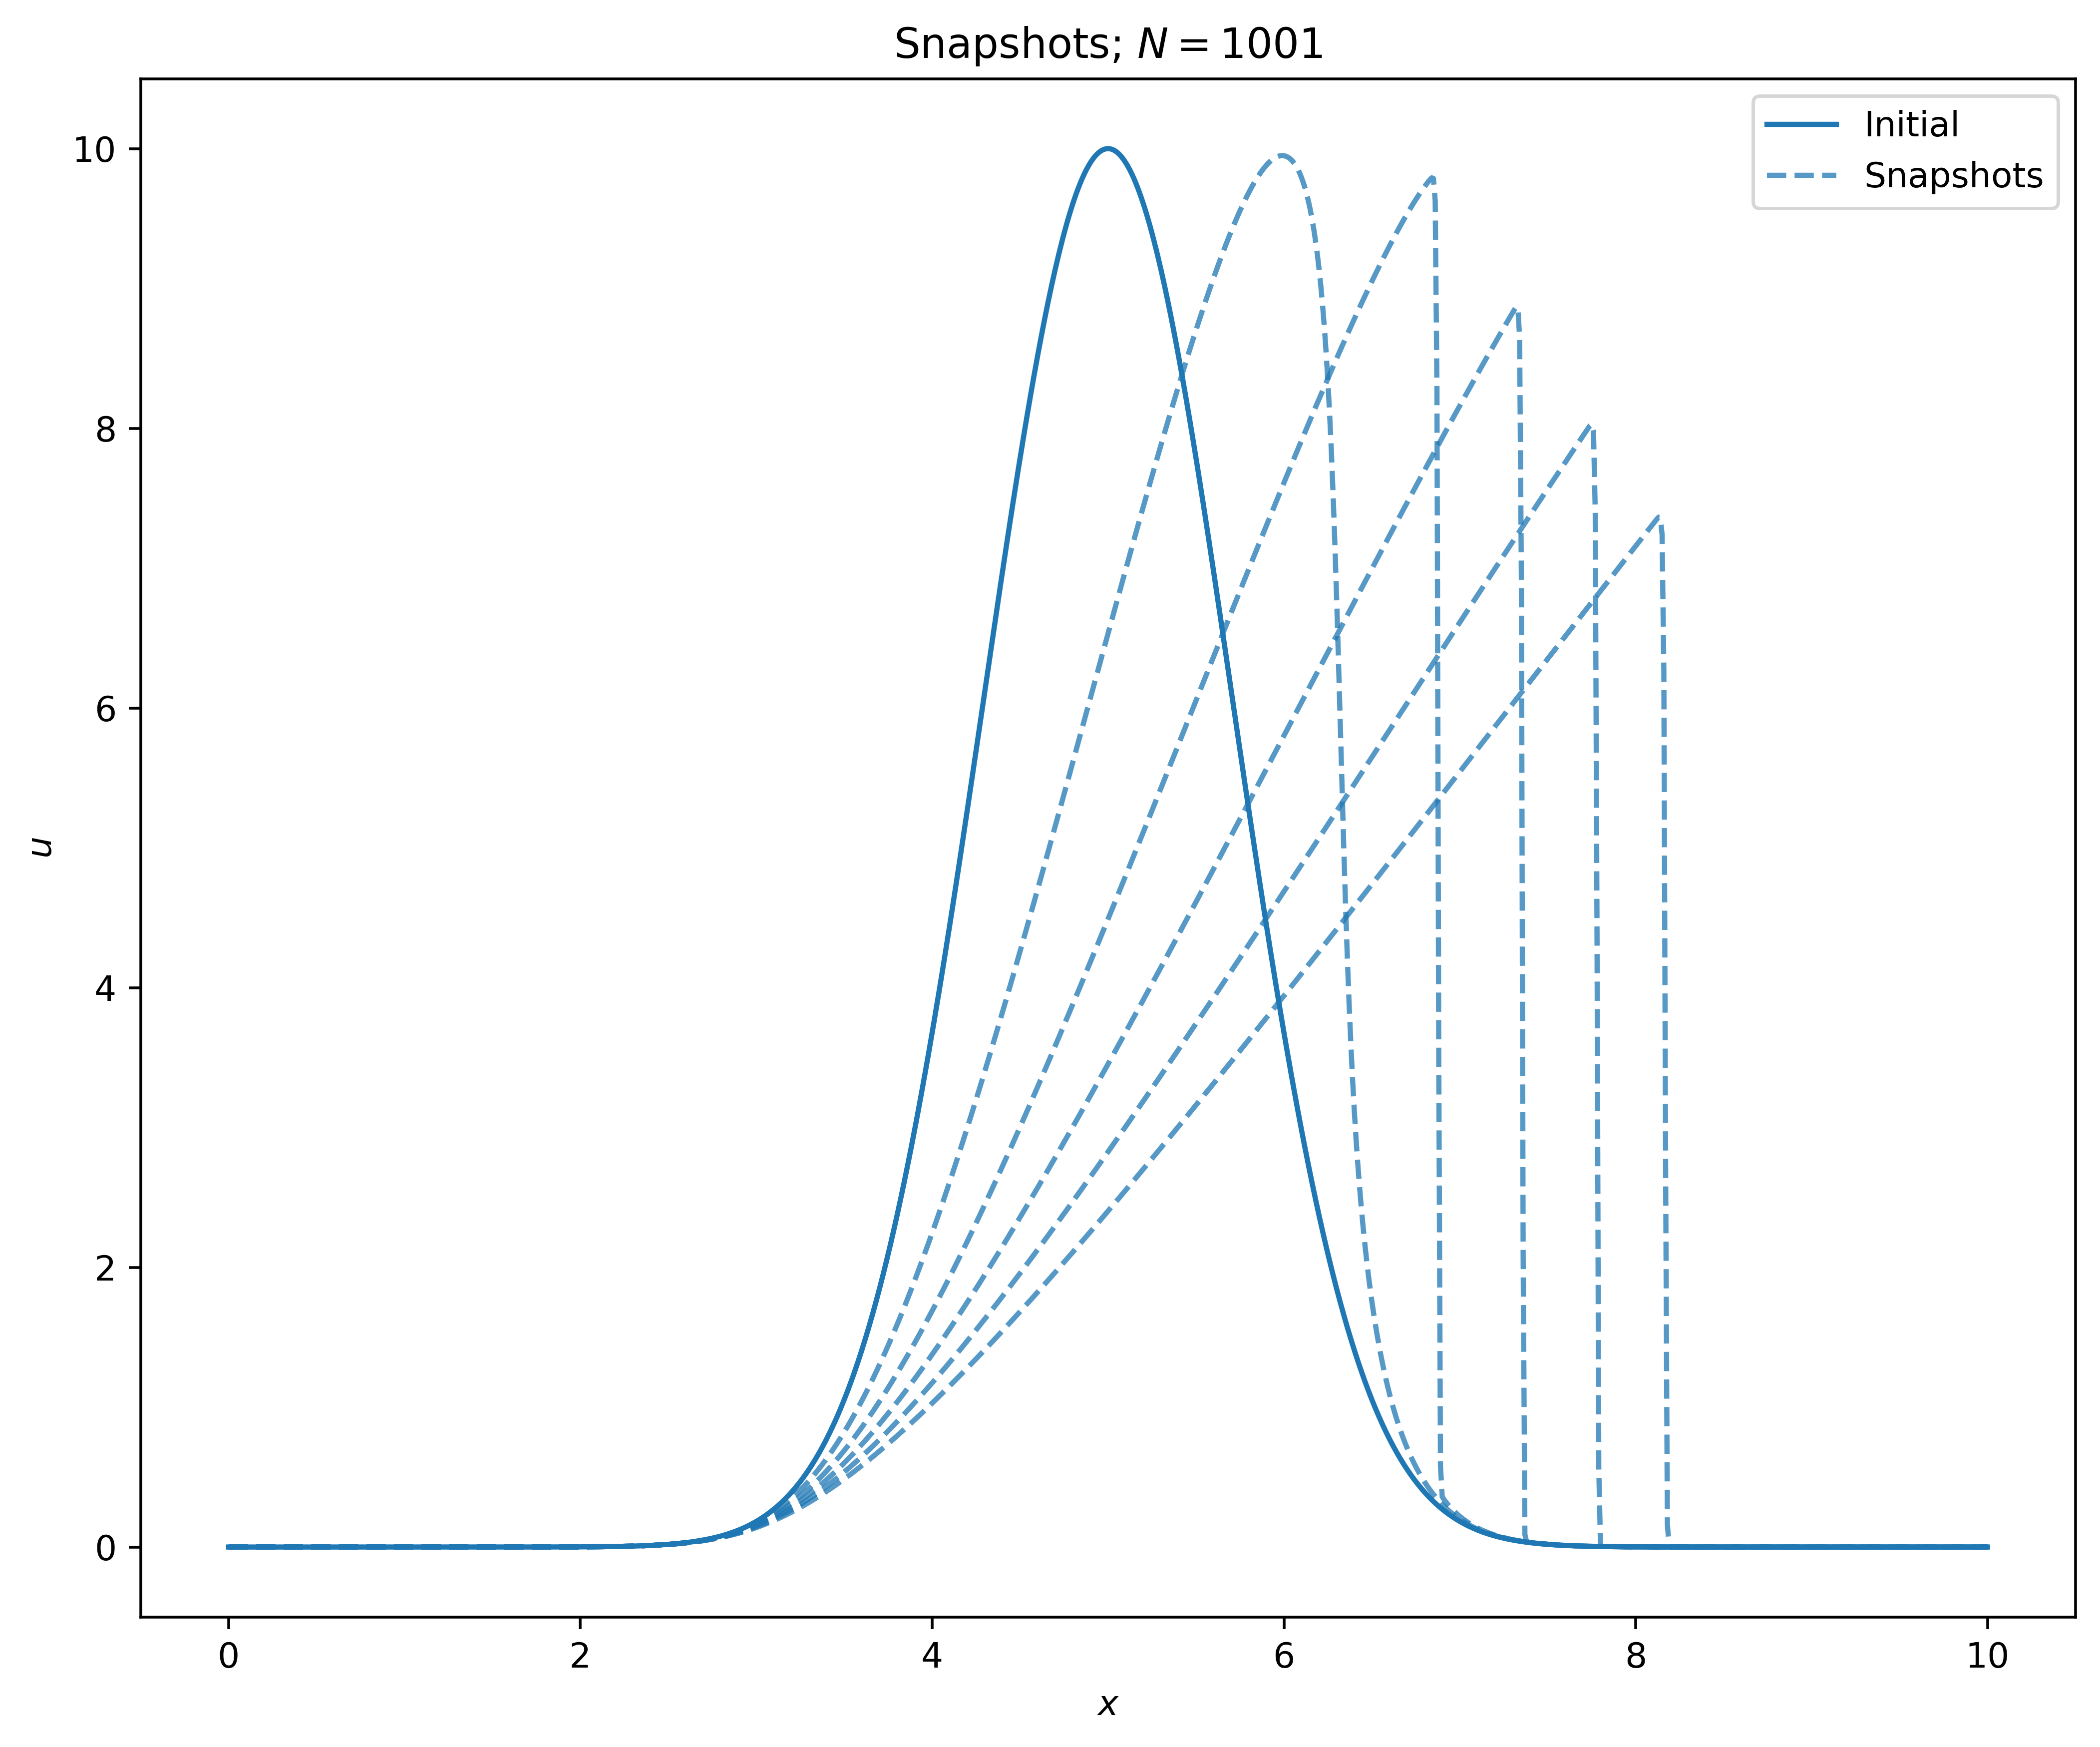

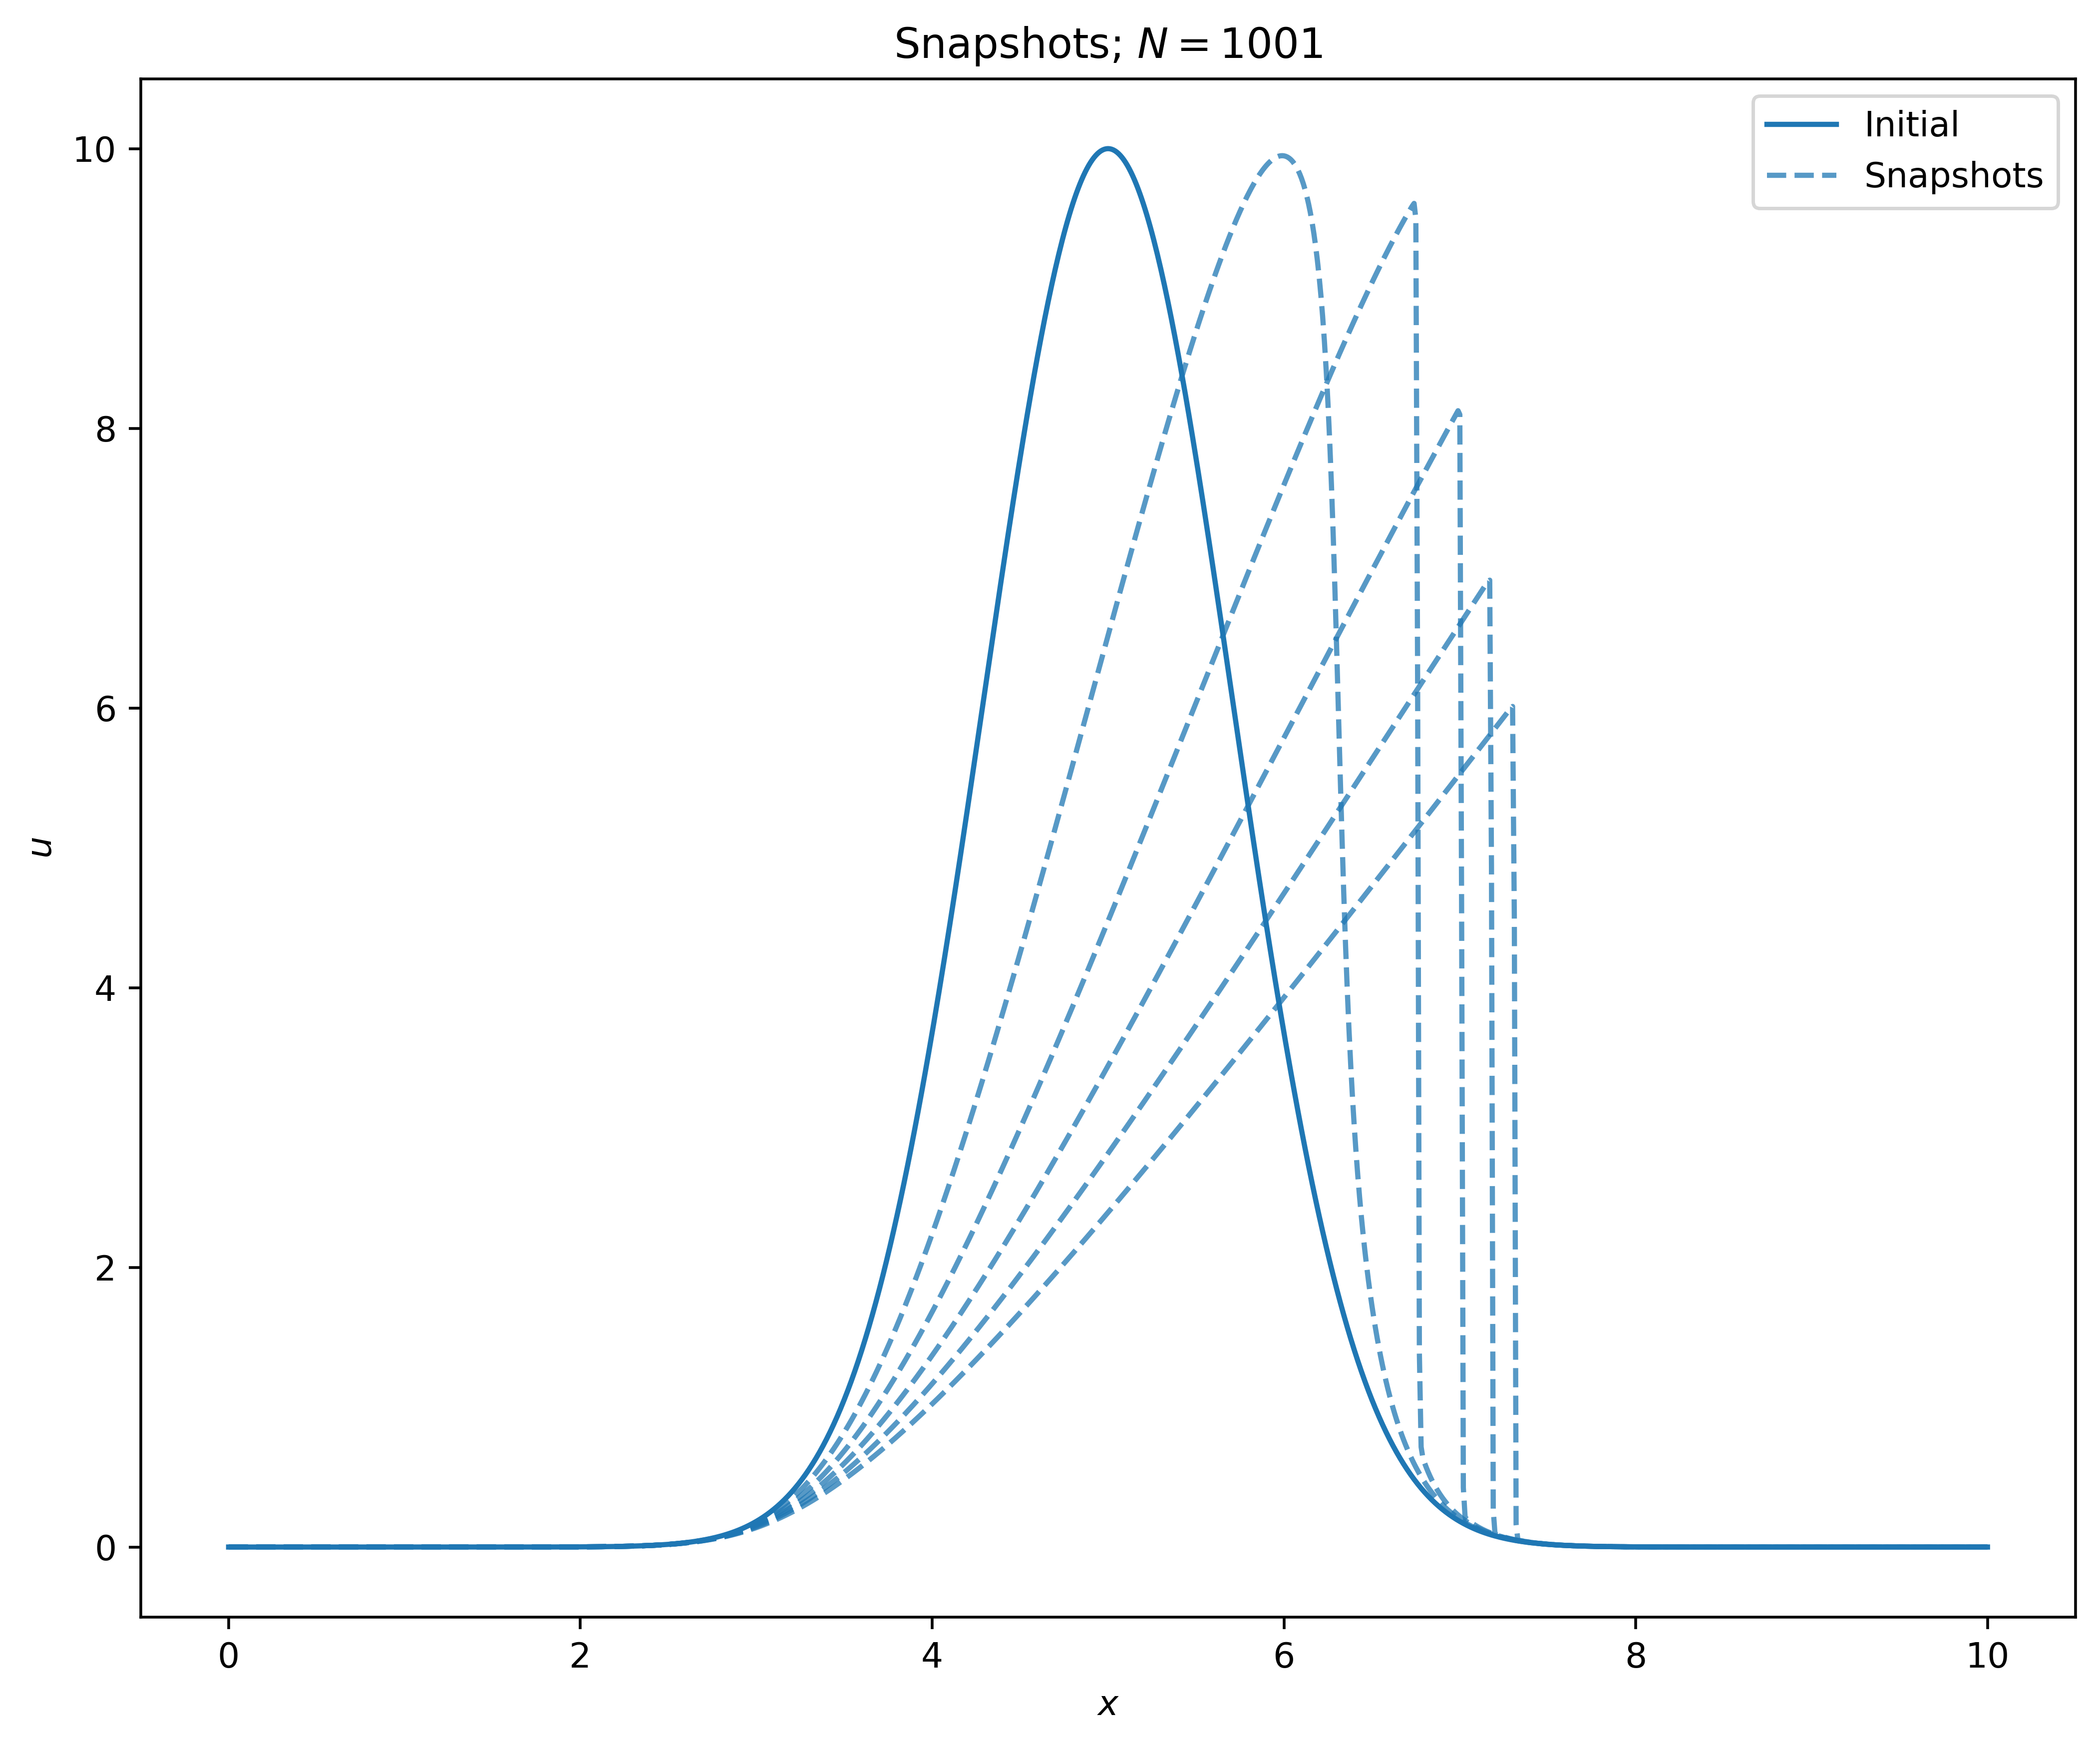

In [141]:
for method in methods:
    plot_method_snap(method, snap_int=2, figsize=figsize, dpi=dpi, save=save)